In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
goodsbelly=pd.read_csv('Goodsbellyreal_data.csv')
goodsbelly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1386 non-null   object 
 1   Region                1243 non-null   object 
 2   Store                 1386 non-null   object 
 3   Units Sold            1386 non-null   float64
 4   Average Retail Price  1386 non-null   float64
 5   Sales Rep             1386 non-null   int64  
 6   Endcap                1386 non-null   int64  
 7   Demo                  1386 non-null   int64  
 8   Demo1-3               1386 non-null   int64  
 9   Demo4-5               1386 non-null   int64  
 10  Natural               1386 non-null   int64  
 11  Fitness               1386 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 130.1+ KB


In [3]:
goodsbelly['Log_AvgRtlPrice'] = np.log(goodsbelly['Average Retail Price'])
goodsbelly.head()

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice
0,04-05-2010,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0,1.479329
1,11-05-2010,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0,1.385717
2,18-05-2010,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0,1.337427
3,25-05-2010,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0,1.344169
4,01-06-2010,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0,1.361617


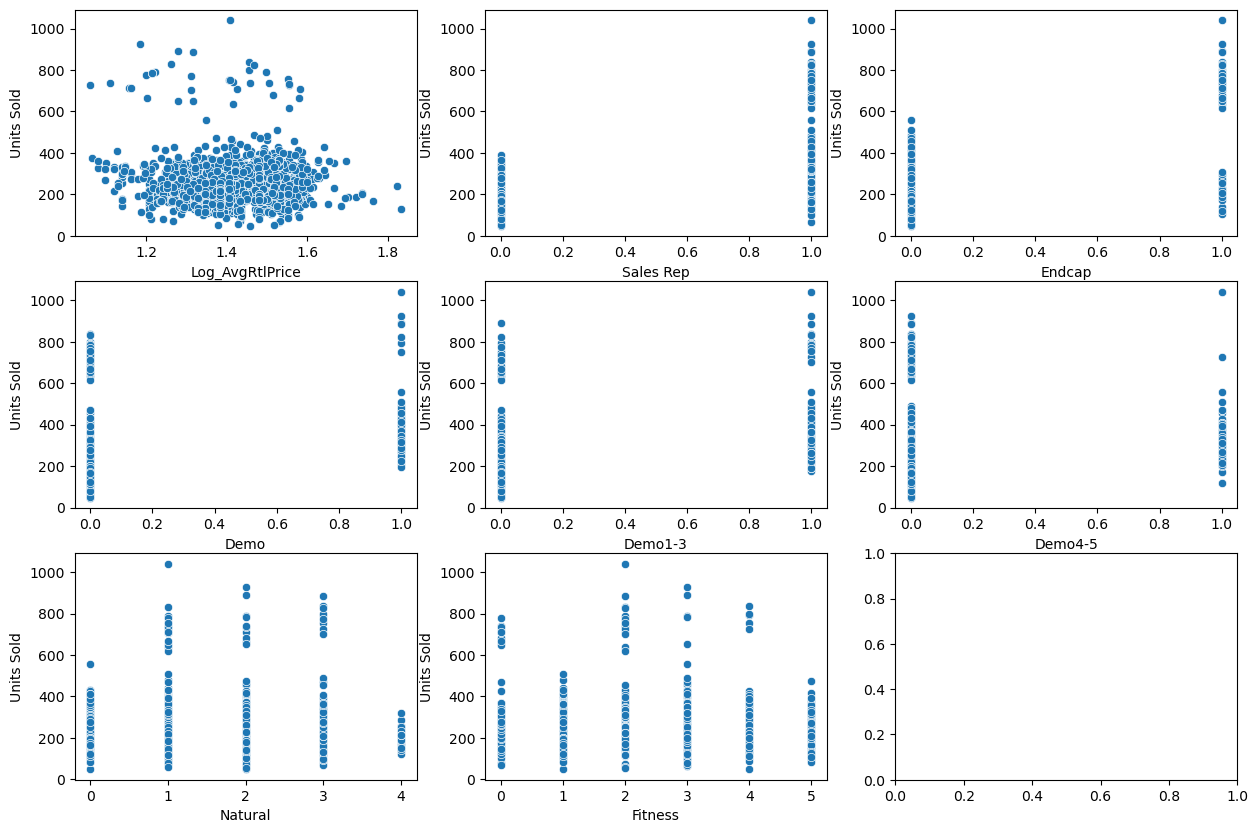

In [4]:
fig, axs =plt.subplots(3,3,figsize=(15,10))
plt0 = sns.scatterplot(data = goodsbelly, x='Log_AvgRtlPrice', y='Units Sold', ax= axs[0,0])
plt1 = sns.scatterplot(data = goodsbelly, x='Sales Rep', y='Units Sold', ax= axs[0,1])
plt2 = sns.scatterplot(data = goodsbelly, x='Endcap', y='Units Sold', ax= axs[0,2])
plt3 = sns.scatterplot(data = goodsbelly, x='Demo', y='Units Sold', ax= axs[1,0])
plt4 = sns.scatterplot(data = goodsbelly, x='Demo1-3', y='Units Sold', ax= axs[1,1])
plt5 = sns.scatterplot(data = goodsbelly, x='Demo4-5', y='Units Sold', ax= axs[1,2])
plt6 = sns.scatterplot(data = goodsbelly, x='Natural', y='Units Sold', ax= axs[2,0])
plt7 = sns.scatterplot(data = goodsbelly, x='Fitness', y='Units Sold', ax= axs[2,1])

In [5]:
goodsbelly['sales_diff'] = np.roll(goodsbelly['Units Sold'],1)
goodsbelly.sales_diff[0]=0
goodsbelly.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_22408\4180945339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodsbelly.sales_diff[0]=0


,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,Natural,Fitness,Log_AvgRtlPrice,sales_diff
0,04-05-2010,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0,1.479329,0.000000
1,11-05-2010,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0,1.385717,150.702088
2,18-05-2010,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0,1.337427,197.403797
3,25-05-2010,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0,1.344169,235.106171
4,01-06-2010,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0,1.361617,226.692427


In [6]:
#Build a statistical model to explain the relationship between sales and promotional efforts and interpret the regression output

x = goodsbelly[['Sales Rep','Endcap','Demo','Demo1-3','Demo4-5','sales_diff']]

# Assign the feature variable to y
y = goodsbelly['Units Sold']

import statsmodels.api as sm
x = sm.add_constant(x)
lm1 = sm.OLS(y,x).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     477.1
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:00:59   Log-Likelihood:                -7714.9
No. Observations:                1386   AIC:                         1.544e+04
Df Residuals:                    1379   BIC:                         1.548e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.1139      4.663     32.196      0.0

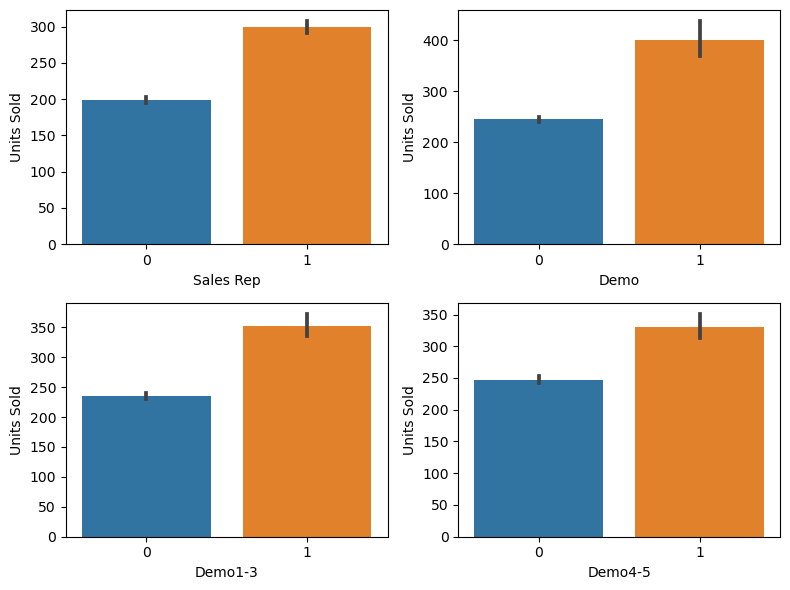

In [7]:
# Does the in-store demo program boost the sales? If so, for how long does the sales lift last?
fig, axs =plt.subplots(2,2,figsize=(8,6))
plt1 = sns.barplot(data = goodsbelly, x='Sales Rep', y='Units Sold', ax = axs[0,0])
plt2 = sns.barplot(data = goodsbelly, x='Demo', y='Units Sold', ax = axs[0,1])
plt3 = sns.barplot(data = goodsbelly, x='Demo1-3', y='Units Sold', ax = axs[1,0])
plt4 = sns.barplot(data = goodsbelly, x='Demo4-5', y='Units Sold', ax = axs[1,1])
plt.tight_layout()

In [8]:
# Does the placement of the product within the store affect the sales
x = goodsbelly['Endcap']
y = goodsbelly['Units Sold']
print("The relation between the placement of the products within the store sales is =",round(x.corr(y),2))

The relation between the placement of the products within the store sales is = 0.59


In [9]:
## What other factors affect the sales of GoodBelly’s products? Based on the regression output, what are your recommendations to GoodBelly’s management?
import statsmodels.api as sm
x=sm.add_constant(x)
lm_2 = sm.OLS(y,x).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     751.5
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          1.63e-132
Time:                        20:01:01   Log-Likelihood:                -8193.0
No. Observations:                1386   AIC:                         1.639e+04
Df Residuals:                    1384   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.6958      2.448     98.308      0.0

In [10]:
# Are there any suggestions to improve and refine the model?
print('Yes, from the data we can see only weekly data is happening, but we can refine the model if sales are happening daily. promotional activties would improve the sales')

Yes, from the data we can see only weekly data is happening, but we can refine the model if sales are happening daily. promotional activties would improve the sales
